In [26]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [27]:
Charge_hourly = pd.read_csv(r'./charge_hourly.csv')

In [28]:
Charge_hourly

,Time,Energy_kWh,weekday,hour,hols
0,2020-12-02 09:00:00,4.213925,2,9,NaN
1,2020-12-02 10:00:00,0.546100,2,10,NaN
2,2020-12-02 11:00:00,-0.008600,2,11,NaN
3,2020-12-02 12:00:00,-0.008500,2,12,NaN
4,2020-12-02 13:00:00,0.005967,2,13,NaN
...,...,...,...,...,...
10030,2022-01-31 21:00:00,0.000000,0,21,NaN
10031,2022-01-31 22:00:00,0.000000,0,22,NaN
10032,2022-01-31 23:00:00,0.000000,0,23,NaN
10033,2022-02-01 00:00:00,0.000000,1,0,NaN


In [33]:
Charge_hourly['Time'] = pd.to_datetime(Charge_hourly['Time'])

In [34]:
Charge_hourly['is_hol'] = ~Charge_hourly.isna()['hols']

In [35]:
Charge_hourly.set_index(['Time'], inplace=True)

In [36]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol
Time,,,,,
2020-12-02 09:00:00,4.213925,2,9,NaN,False
2020-12-02 10:00:00,0.546100,2,10,NaN,False
2020-12-02 11:00:00,-0.008600,2,11,NaN,False
2020-12-02 12:00:00,-0.008500,2,12,NaN,False
2020-12-02 13:00:00,0.005967,2,13,NaN,False
...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,NaN,False
2022-01-31 22:00:00,0.000000,0,22,NaN,False
2022-01-31 23:00:00,0.000000,0,23,NaN,False


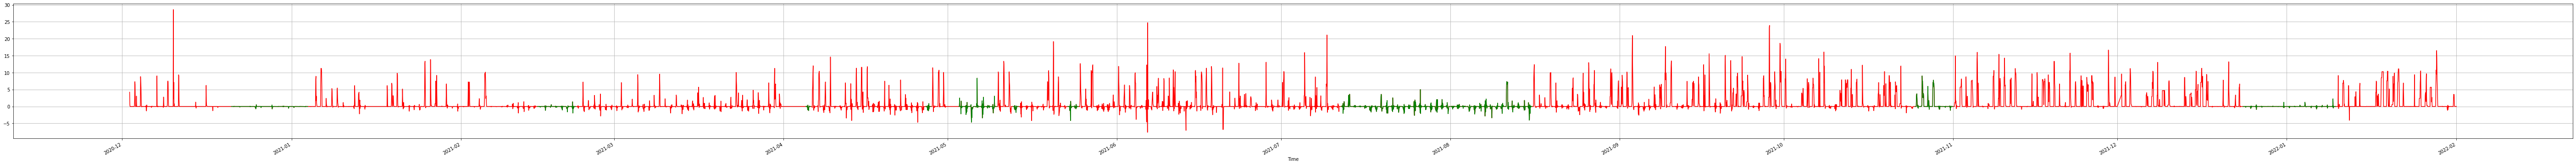

In [38]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [54]:
R_value = pd.read_json(r'./Rvalue.json', orient='split')

In [55]:
R_value

,Date,Rt_low,Rt_avg,Rt_up,population,version
0,2020-02-17,0.50,1.93,4.00,hosp,3
1,2020-02-18,0.00,1.74,4.00,hosp,3
2,2020-02-19,0.50,1.59,2.83,hosp,3
3,2020-02-20,0.83,1.74,2.83,hosp,3
4,2020-02-21,0.67,2.03,3.67,hosp,3
...,...,...,...,...,...,...
748,2022-03-06,0.99,NaN,1.01,testpos,3
749,2022-03-07,0.96,NaN,0.98,testpos,3
750,2022-03-08,0.94,NaN,0.96,testpos,3
751,2022-03-09,0.92,NaN,0.94,testpos,3


In [65]:
R_value.set_index(['Date'], inplace=True)

In [74]:
Charge_hourly['R'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'R'] = R_value.loc[str(Charge_hourly.index.date[i]),'Rt_avg']

In [75]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,R
Time,,,,,,
2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21
2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21
2020-12-02 11:00:00,-0.008600,2,11,NaN,False,1.21
2020-12-02 12:00:00,-0.008500,2,12,NaN,False,1.21
2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21
...,...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96
2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96
2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96


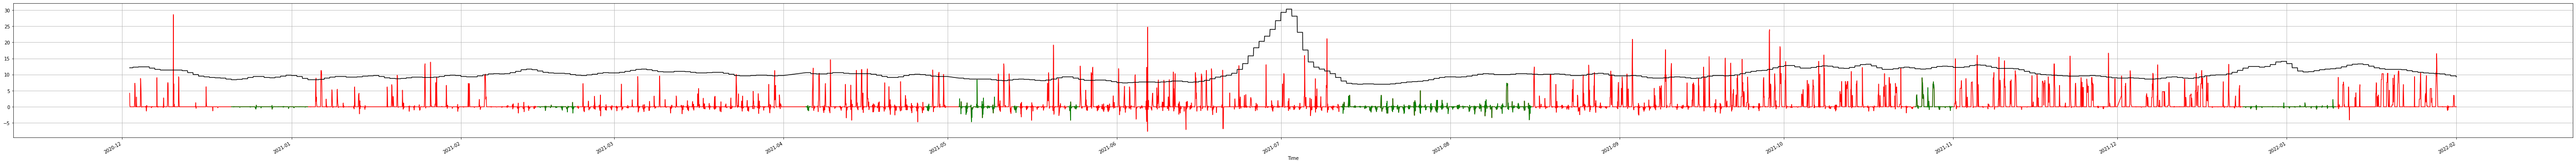

In [78]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['R']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [81]:
ic = pd.read_csv(r'./COVID-19_ic_opnames.csv', sep=';')

In [82]:
ic

,Version,Date_of_report,Date_of_statistics,IC_admission_notification,IC_admission
0,1,2022-03-14 00:30:00,2020-02-27,0,0
1,1,2022-03-14 00:30:00,2020-02-28,0,0
2,1,2022-03-14 00:30:00,2020-02-29,0,1
3,1,2022-03-14 00:30:00,2020-03-01,0,1
4,1,2022-03-14 00:30:00,2020-03-02,0,0
...,...,...,...,...,...
741,1,2022-03-14 00:30:00,2022-03-09,14,15
742,1,2022-03-14 00:30:00,2022-03-10,11,11
743,1,2022-03-14 00:30:00,2022-03-11,19,11
744,1,2022-03-14 00:30:00,2022-03-12,8,6


In [86]:
ic['Date_of_statistics'] = pd.to_datetime(ic['Date_of_statistics'])

In [87]:
ic.set_index(['Date_of_statistics'], inplace=True)

In [88]:
Charge_hourly['IC_number'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'IC_number'] = ic.loc[str(Charge_hourly.index.date[i]),'IC_admission']

In [89]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number
Time,,,,,,,
2020-12-02 09:00:00,4.213925,2,9,NaN,False,1.21,30.0
2020-12-02 10:00:00,0.546100,2,10,NaN,False,1.21,30.0
2020-12-02 11:00:00,-0.008600,2,11,NaN,False,1.21,30.0
2020-12-02 12:00:00,-0.008500,2,12,NaN,False,1.21,30.0
2020-12-02 13:00:00,0.005967,2,13,NaN,False,1.21,30.0
...,...,...,...,...,...,...,...
2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0
2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0
2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0


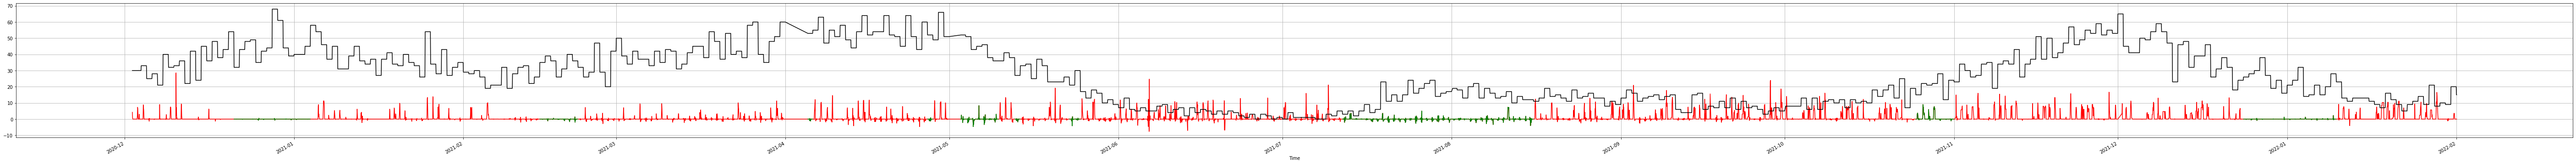

In [90]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = Charge_hourly['IC_number'].plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()